For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.


We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action)
Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

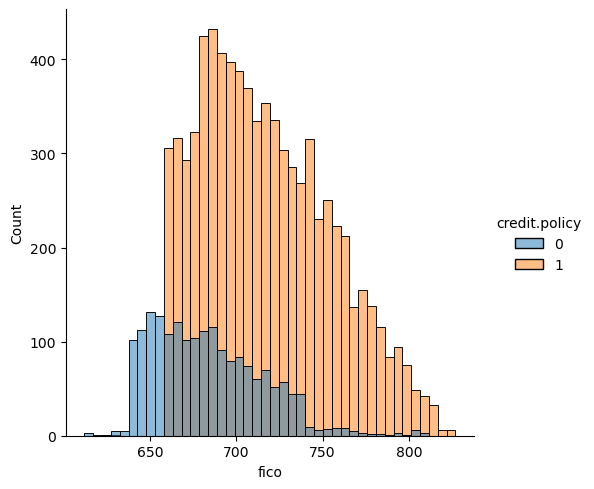

In [6]:
sns.displot(x='fico', data=df, hue='credit.policy')

**similar figure, except this time select by the not.fully.paid column.**

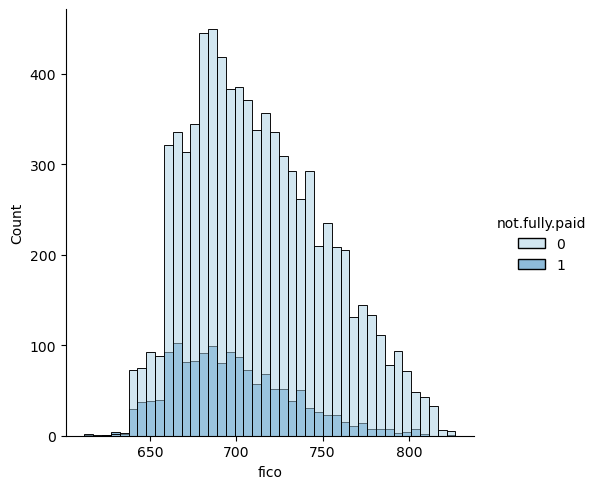

In [7]:
sns.displot(x='fico', data=df, hue='not.fully.paid', palette='Paired')

<AxesSubplot:xlabel='purpose', ylabel='count'>

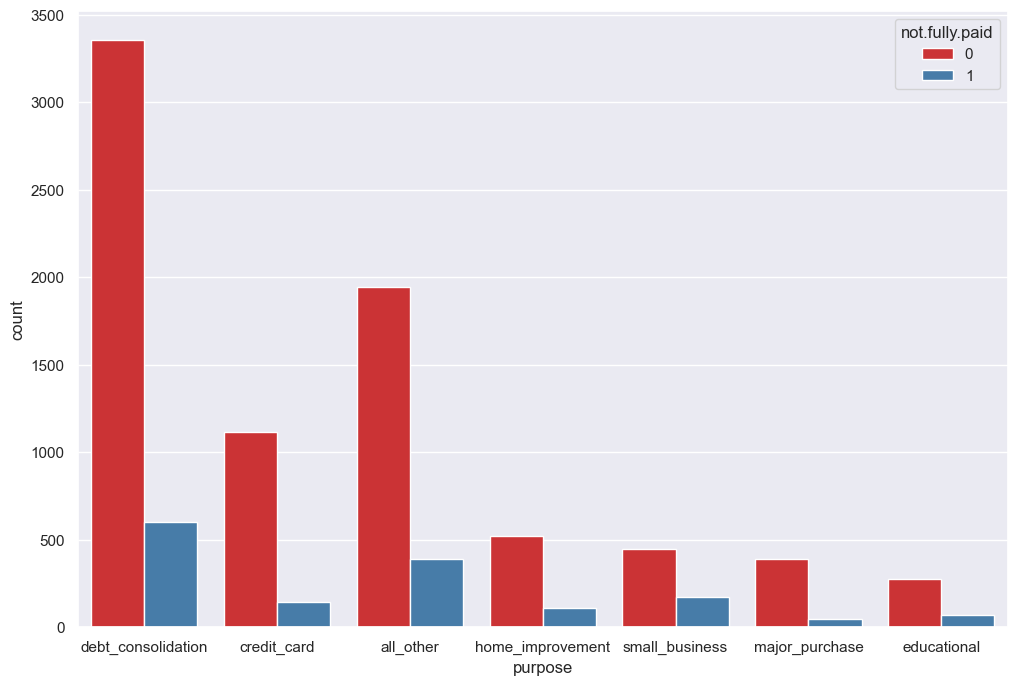

In [8]:
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x='purpose', data=df,hue='not.fully.paid', palette='Set1')

<AxesSubplot:>

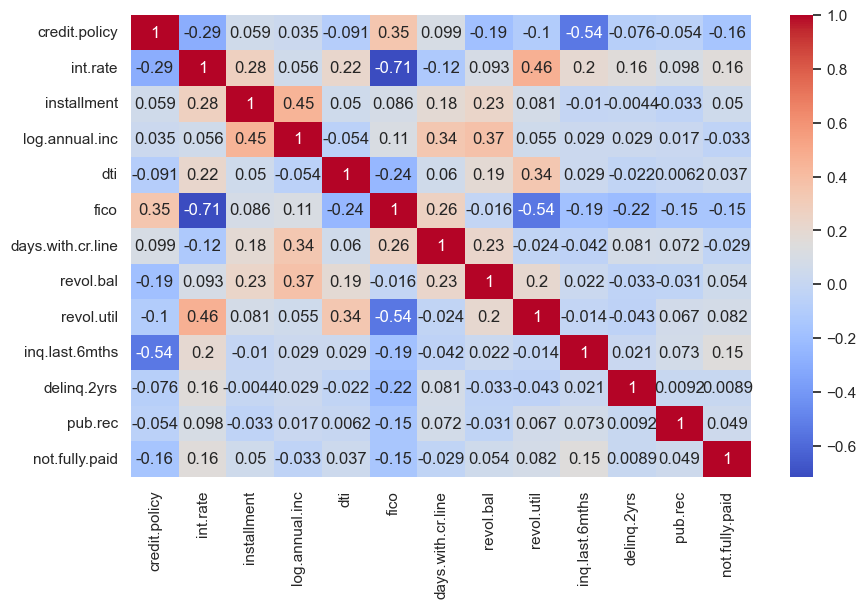

In [9]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

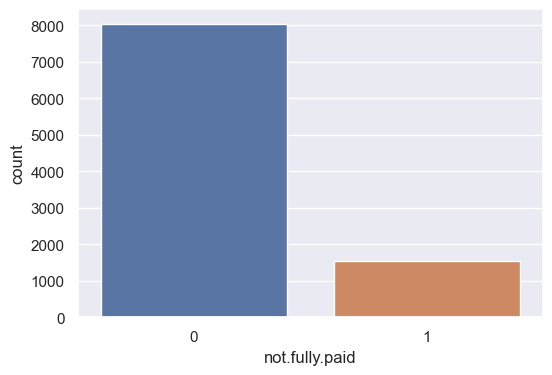

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='not.fully.paid', data=df)

In [11]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

# Data Preprocessing


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


the **purpose** column as categorical

In [13]:
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

In [14]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


### Train-Test Split

In [15]:
from sklearn.model_selection import train_test_split
X = df.drop('not.fully.paid',axis=1)
y = df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Tree-based algorithms - Decision Tree

## Hyperparameter Tuning via Grid Search with Cross-Validation



In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [17]:
# Define the hyperparameters and their values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [18]:
# Initialize the Decision Tree classifier
dtree = DecisionTreeClassifier()

In [19]:
# Initialize Grid Search with cross-validation (using 5 folds)
grid_search = GridSearchCV(dtree, param_grid, cv=5, verbose=1, n_jobs=-1)

In [20]:
# Fit the model with the parameter candidates
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=1)

In [21]:
# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}


In [22]:
# Test the model with the best parameters on the test set
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
best_tree = grid_search.best_estimator_
predictions = best_tree.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[2347   84]
 [ 408   35]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2431
           1       0.29      0.08      0.12       443

    accuracy                           0.83      2874
   macro avg       0.57      0.52      0.51      2874
weighted avg       0.77      0.83      0.78      2874



# Tree-based algorithms - Random Forest


In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
# Define the hyperparameters and their values
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [26]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier()

In [27]:
grid_search = GridSearchCV(rf, param_grid, cv=5, verbose=1, n_jobs=-1)

In [28]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=1)

In [29]:
# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [30]:
best_rf = grid_search.best_estimator_
predictions = best_rf.predict(X_test)

In [31]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[2426    5]
 [ 437    6]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.55      0.01      0.03       443

    accuracy                           0.85      2874
   macro avg       0.70      0.51      0.47      2874
weighted avg       0.80      0.85      0.78      2874



# Tree-based algorithms - XGBoost 


Due to imbalance nature of our target variables we will try different methods to address this imbalance, and see whcih one improves our model

Method #1 using StratifiedKFold and scale_pos_weight

In [32]:
import xgboost as xgb

In [33]:
from sklearn.model_selection import StratifiedKFold

In [34]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [35]:
positive_counts = 1533
negative_counts = 8045
scale_pos_weight_value = negative_counts / positive_counts

In [36]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'gamma': [0.0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


In [37]:
# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective="binary:logistic", scale_pos_weight=scale_pos_weight_value)

In [38]:
# Create StratifiedKFold object
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [39]:
# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(xgb_clf, param_grid, cv=strat_kfold, verbose=1, n_jobs=-1)

In [40]:
# Fit the model with the parameter candidates
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_typ...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                      

In [41]:
# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 0.8}


In [42]:
# Test the model with the best parameters on the test set
best_xgb = grid_search.best_estimator_
predictions = best_xgb.predict(X_test)

In [43]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[2251  180]
 [ 386   57]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2431
           1       0.24      0.13      0.17       443

    accuracy                           0.80      2874
   macro avg       0.55      0.53      0.53      2874
weighted avg       0.76      0.80      0.78      2874



Method #2 using only scale_pos_weight

In [44]:
xgb_clf = xgb.XGBClassifier(objective="binary:logistic", scale_pos_weight=scale_pos_weight_value)

In [45]:
grid_search = GridSearchCV(xgb_clf, param_grid, cv=10, verbose=1, n_jobs=-1)

In [46]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                         

In [47]:
best_xgb = grid_search.best_estimator_
predictions = best_xgb.predict(X_test)

In [48]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[2249  182]
 [ 365   78]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      2431
           1       0.30      0.18      0.22       443

    accuracy                           0.81      2874
   macro avg       0.58      0.55      0.56      2874
weighted avg       0.77      0.81      0.79      2874



Method #3 Bootstrap sample the minority class

In [49]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy= 'minority')

In [50]:
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

print(y_train_over.value_counts())

1    5614
0    5614
Name: not.fully.paid, dtype: int64


In [51]:
grid_search = GridSearchCV(xgb_clf, param_grid, cv=3, verbose=1, n_jobs=1)

In [52]:
grid_search.fit(X_train_over, y_train_over)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                         

In [53]:
best_xgb = grid_search.best_estimator_
predictions = best_xgb.predict( X_test)

In [54]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1841  590]
 [ 289  154]]
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      2431
           1       0.21      0.35      0.26       443

    accuracy                           0.69      2874
   macro avg       0.54      0.55      0.53      2874
weighted avg       0.76      0.69      0.72      2874



#  Tree-based algorithms - LightGBM


In [55]:
import lightgbm as lgb

In [56]:
# Define parameter grid
param_grid_lgbm = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [40, 60, 80, 100],
    'num_leaves': [31, 50, 100],
    'boosting_type' : ['gbdt', 'dart'],
    'objective' : ['binary'],
    'random_state' : [501], 
    'colsample_bytree' : [0.5, 0.7, 1.0],
    'subsample' : [0.5, 0.7, 1.0],
    'reg_alpha' : [1, 1.2],
    'reg_lambda' : [1, 1.2, 1.4]
}


In [57]:
lgbm = lgb.LGBMClassifier(verbose=0)


In [58]:
grid_search_lgbm = GridSearchCV(lgbm, param_grid_lgbm, cv=3, verbose=1, n_jobs=1)


In [59]:
grid_search_lgbm.fit(X_train_over, y_train_over)


Fitting 3 folds for each of 3888 candidates, totalling 11664 fits


GridSearchCV(cv=3, estimator=LGBMClassifier(verbose=0), n_jobs=1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'colsample_bytree': [0.5, 0.7, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [40, 60, 80, 100],
                         'num_leaves': [31, 50, 100], 'objective': ['binary'],
                         'random_state': [501], 'reg_alpha': [1, 1.2],
                         'reg_lambda': [1, 1.2, 1.4],
                         'subsample': [0.5, 0.7, 1.0]},
             verbose=1)

In [60]:
best_lgbm = grid_search_lgbm.best_estimator_


In [61]:
predictions_lgbm = best_lgbm.predict(X_test)


In [62]:
# Print the results
print(confusion_matrix(y_test, predictions_lgbm))
print(classification_report(y_test, predictions_lgbm))

[[2194  237]
 [ 345   98]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2431
           1       0.29      0.22      0.25       443

    accuracy                           0.80      2874
   macro avg       0.58      0.56      0.57      2874
weighted avg       0.78      0.80      0.79      2874



#  Tree-based algorithms - CatBoost


In [63]:
from catboost import CatBoostClassifier

In [64]:
param_grid_catboost = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'iterations': [100, 200, 300]
}

In [65]:
catboost = CatBoostClassifier(verbose=0)

In [66]:
grid_search_catboost = GridSearchCV(catboost, param_grid_catboost, cv=3, verbose=1, n_jobs=1)
grid_search_catboost.fit(X_train_over, y_train_over)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000028CF9C21CD0>,
             n_jobs=1,
             param_grid={'depth': [4, 6, 8, 10], 'iterations': [100, 200, 300],
                         'l2_leaf_reg': [1, 3, 5, 7, 9],
                         'learning_rate': [0.01, 0.05, 0.1]},
             verbose=1)